In [1]:
# Setting html stuff for the rest of the notebook
from IPython.core.display import display, HTML, Javascript
html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
    <style>
    
    .top_section{
        background-color: #00AF87;
        color: white;
        font-family: Copperplate, Papyrus, fantasy;
        font-weight: 800;
        font-size: 35px;
        padding: 20px 14px;
        margin-bottom: 20px;
    }
    
 
    </style>
    </head>
    
</html>
"""

HTML(html_contents)

<center><strong><h1> <div class="top_section">In depth series 1: SENTIMENT ANALYSIS, why and how, EDA and solutions with Transformers</div></h1></strong></center>



I chose a sample dataset for Sentiment Analysis and embodied the subject I explained on a real example.

Then I made a detailed analysis on the dataset and visualized it.

After preprocessing the data, I tried to complete the Sentimet Analysis task with state-of-the-art models.

I analyzed the results of this model and interpreted its outputs.


<center><h1><div class="top_section">Table of Contents </div></h1></center>

1.  **[SENTIMENT ANALYSIS](#sentiment_analysis)**

    - [Types of Sentiment Analysis](#types_of_sentiment_analysis)
        - [Emotion Detection](#emotion_detection)
        - [Multilingual Sentiment Analysis](#multilingual_sentiment_analysis)
        - [Graded Sentiment Analysis](#graded_sentiment_analysis)
        - [Aspect-based Sentiment Analysis](#aspect_base_sentiment_analysis)
        - [Intent Analysis](#intent_analysis)  
    - [The overall benefits of sentiment analysis include](#the_overall_benefits_of_sentiment_analysis_include)
       - [Sorting Data at Scale](#the_overall_benefits_of_sentiment_analysis_include)
       - [Real-Time Analysis](#the_overall_benefits_of_sentiment_analysis_include)
       - [Discovering New Marketing Strategies](#the_overall_benefits_of_sentiment_analysis_include) 
    - [Sentiment analysis Approaches](#sentiment_analysis_Approaches)
       - [Rule-based Approaches](#rule_based_approaches)
       - [Automatic Approaches](#automatic_approaches)
       
2.  **[EDA](#eda)**
       - [Information of the DATA](#information_of_the_data)
       - [Information of the Problem](#information_of_the_problem)
       - [Imports](#imports)
       - [Helper Functions](#helper_functions)
       - [Read Data](#read_data)
       - [Visualizations](#visualizations)
           - [Word Cloud](#word_cloud)
           - [Target Count](#target_count)
           - [Token Counts with simple tokenizer](#token_counts_with_simple_tokenizer)
           - [Token Counts with BERT tokenizer](#token_counts_with_BERT_tokenizer)
           - [Word Counts](#word_counts)
           - [Most Common ngrams](#most_common_ngrams)
3.  **[MODELS](#models)**
    - [A brief information about BERT](#brief_informartion_about_Bert)
    - [Comparison of Transformer Models](#comparison_of_Transformer_Models)
4. **[INFERENCE](#inference)**
5. **[REFERENCES](#references)**


    




    

        
        



<a id="sentiment_analysis"></a>

<center><h1><div class="top_section">1. SENTIMENT ANALYSIS</div></h1></center>

<img src="https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/sentimentanalysishotelgeneric-2048x803-1.jpg">
                
                    source = https://d3caycb064h6u1.cloudfront.net/wp-content/uploads/2021/06/sentimentanalysishotelgeneric-2048x803-1.jpg


Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

Sentiment analysis helps data analysts within large enterprises gauge public opinion, conduct nuanced market research, monitor brand and product reputation, and understand customer experiences. In addition,  companies often develop sentiment analysis systems for customer experience management, social media monitoring, or workforce analytics platform to about their own customers.

<a id="types_of_sentiment_analysis"></a>
<strong><h2>Types of Sentiment Analysis</h2></strong>

![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/Sentiments-analysis_types.png)
                
                source = https://mobcoder.com/blog/sentimental-analysis-how-the-phenomenon-changing-the-dynamics-of-brand-monitoring/

Sentiment analysis is aimed at determining the general emotional state of a text. One of these cases focuses on the polarity of a text (positive, negative, neutral) but it also goes beyond polarity to detect specific feelings and emotions (angry, happy, sad, etc), urgency (urgent, not urgent) and even intentions (interested v. not interested).

Let's explain them in more detail

<a id="emotion_detection"></a>

**Emotion Analysis**

<img src="https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/emotions_boy.jpg" width="800">

            source = https://kids.frontiersin.org/articles/10.3389/frym.2018.00015

The type of emotion analysis in which emotion types(happiness, frustration, anger, and sadness) are classified is called **emotion detection.**

There are some difficulties with this classification. Users can express their feelings with many different words. They can use a word with a bad meaning for happiness. The most difficult examples of classification models here are; For example, the sentence "I connect to customer service too late, it's killing me" is a negative sentence, while the sentence "you are killing me" is positive.

<a id="multilingual_sentiment_analysis"></a>


**Multilingual Sentiment Analysis**


It is the version of Sentiment Analysis systems that provides multi-language support. What is mentioned here is to do sentiment analysis in more than one language.

I usually have two suggestions for this:

My first suggestion is to detect the language of the text with the language classifier and run a sentimen analysis model suitable for this language. The second method is to develop a Multilingual language model and finetune this model and make the model work in many languages.



<a id="#graded_sentiment_analysis"></a>

**Graded Sentiment Analysis**

![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/gradient_Sentiment.png)
            
            source = https://i.pinimg.com/originals/5b/7d/62/5b7d62fb62b03b8142b402cb85644865.png

If the precision of the mood is important, the categories can be further elaborated. A broader classification can be made, not just positive and negative:

* Very positive
* Positive
* Neutral
* Negative
* Very negative


This classification is often used in reviews and reviews where 5 stars are awarded.

* Very Positive = 5 stars
* Very Negative = 1 star


<a id="aspect_base_sentiment_analysis"></a>

**Aspect-based Sentiment Analysis**

![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/aspectbase.png)

        source = https://www.surveysensum.com/wp-content/uploads/2020/02/SENTIMENT-09-1.png

Generally, when analyzing the emotions of the texts, the focus is on determining whether the comment/opinion is positive or negative. But we do not focus on what is positive or negative in this text.

To put it more clearly, in the expression "I did not like the product at all, the size is too small", the user is not satisfied with the product and complains about its dimensions. In a normal sentiment analysis, this sentence is classified as negative, but in **aspect-based sentiment analysis**, the "the size is too small" part is also focused on.

<a id="intent_analysis"></a>

**Intent Analysis**

Intent analysis focuses on what the user wants to do. Understanding what the user wants to do will allow us to better guide him.

For example, being able to understand that a customer browsing an e-commerce site has a shopping intention also allows us to offer him the right products.

One of the most used areas is the smart assistant systems in the applications. It allows us to direct users to the right places within the application in line with their requests and we can offer a better application experience to the user.


<a id="the_overall_benefits_of_sentiment_analysis_include"></a>

**The overall benefits of sentiment analysis include:**

**Sorting Data at Scale**

Users make a lot of comments about brands, it is almost impossible to process them manually. Sentiment analysis enables businesses to automatically classify large amounts of raw data.


**Real-Time Analysis**

Companies can learn the wishes of their customers by analyzing the social media comments about you in real time. They can identify the angry customer and ensure his satisfaction.

**Discovering New Marketing Strategies**

With more data and information gathered through sentiment analysis, the organizations could develop an effective marketing strategy.

The outcome from the strategies can be measured from the customers’ positive or negative key messages.

By observing the customers’ conversations on their social media and detect the specific key messages related to your brand, specific marketing campaigns can be designed for the target consumers. 

<a id="sentiment_analysis_Approaches"></a>

**Sentiment analysis algorithms fall into one of three buckets:**

* <strong>Rule-based:</strong> these systems automatically perform sentiment analysis based on a set of manually crafted rules.
* <strong>Automatic:</strong> systems rely on machine learning techniques to learn from data.


**Rule-based Approaches**

Usually, a rule-based system tries to help determine the subjectivity of the sentence, the polarity, or the subject matter of an idea. The most used tool here is "regex".

These rules usually include the following two NLP techniques:

* Stemming, tokenization, part-of-speech tagging and parsing.
* Lexicons (i.e. lists of words and expressions).


The working mechanism of these systems is briefly as follows;

1. Build a list of polarized words (e.g. bad-good, worst-best, ugly-beautiful etc). You can find them as open source

2. The ratio of positive and positive words in a sentence

Rule-based approaches are now obsolete, not used as much as they used to be. Rule-based approaches fail to detect ironies, not exactly how users are feeling. For this reason, automated approaches are gaining more importance now.





<a id="automatic_approaches"></a>

**Automatic Approaches**

These systems don’t rely on manually crafted rules, but on machine learning techniques, such as classification. Classification, which is used for sentiment analysis, is an automatic system that needs to be fed sample text before returning a category, e.g. positive, negative, or neutral.

Here’s how a machine learning classifier can be implemented:



**Classification Algorithms**

The classification step usually involves a statistical model like Naïve Bayes, Logistic Regression, Support Vector Machines, or Neural Networks:

* <strong>Naïve Bayes:</strong> are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (see Bayes classifier).
* <strong>Linear Regression:</strong> is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).
* <strong>Support Vector Machines(SVM):</strong> is a supervised machine learning algorithm that can be used for classification or regression problems. However, it is mostly used in classification problems. Support Vector Machine is a boundary that best separates two classes (hyperplane/line)
* <strong>Deep Learning:</strong> (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.

**We can explain the sentiment analysis in general like this. Now we have determined a data for how we will apply it next, and we will spread visualizations on that data and train models.**

<a id="eda"></a>
<strong><center><h1><div class="top_section">2. EDA</div></h1></center></strong>


<a id="information_of_the_data"></a>

<strong><h1> Information of the Data </h1></strong>

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!

<b>How to use</b>
* Predict Review Rating
* Topic Modeling on Reviews
* Explore key aspects that make hotels good or bad

<a id="information_of_the_problem"></a>

<strong><h1> Information of the Problem </h1></strong>

Customer satisfaction is very important for the service industry. For this reason, it is necessary to determine the emotional state of the customer's thoughts. We need to classify the user's emotion in our hotel reviews data.



<a id="imports"></a>

<strong><h1>Imports</h1></strong>

In [2]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt



In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>


<a id="helper_functions"></a>

<strong><h1>Helper Functions</h1></strong>

In [5]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """ 

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text
    
def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()


In [6]:
# label encode
def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 3:
        return 1
    if x == 5 or x == 4:
        return 2
    
# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"
    

<a id="read_data"></a>

<strong><h1>Read Data</h1></strong>

In [7]:
df = pd.read_csv("../input/trip-advisor-hotel-reviews/tripadvisor_hotel_reviews.csv")

In [8]:
# show column names
print("df.columns: ", df.columns) 

df.columns:  Index(['Review', 'Rating'], dtype='object')


In [9]:
# head of df
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [10]:
# count of ratings
fig = px.histogram(df,
             x = 'Rating',
             title = 'Histogram of Review Rating',
             template = 'ggplot2',
             color = 'Rating',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [11]:
# basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [12]:
# encode label and mapping label name
df["label"] = df["Rating"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))

In [13]:
# clean text, lowercase and remove punk
df["Review"] = df["Review"].apply(lambda x: remove_punct(clean(remove_emoji(x).lower())[0][0]))

In [14]:
df.head()

,Review,Rating,label,label_name
0,nice hotel expensive parking got good deal sta...,4,2,Positive
1,ok nothing special charge diamond member hilto...,2,0,Negative
2,nice rooms not 4 experience hotel monaco seat...,3,1,Neutral
3,unique great stay wonderful time hotel monac...,5,2,Positive
4,great stay great stay went seahawk game aweso...,5,2,Positive


<a id="visualizations"></a>


<strong><h1>Visualizations</h1></strong>

<a id="word_cloud"></a>

## Word Cloud 

Word clouds generators work by breaking the text down into component words and counting how frequently they appear in the body of text. We can quickly obtain preliminary information about the data. We can understand what a dataset we don't know is talking about.

In [15]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40, 
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

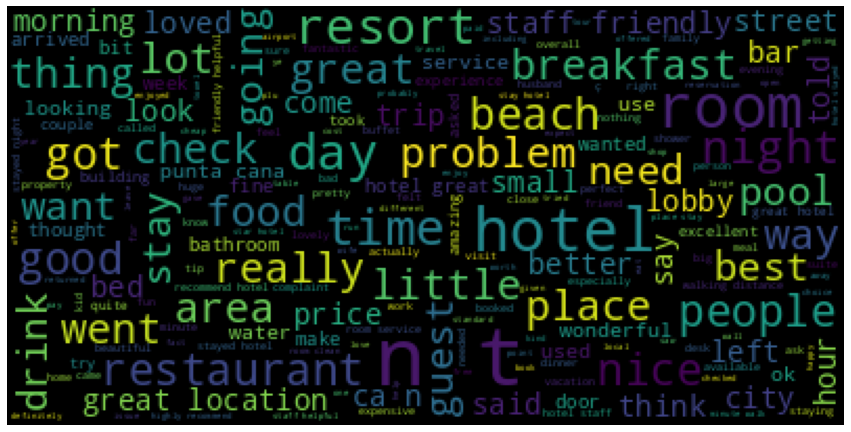

In [16]:
show_wordcloud(df["Review"].values)

<a id="target_count"></a>

## Target Count

How many targets do we have? Learning this information will give us an idea about the model we will build. It will also provide guidance on our methods of analyzing data.


In [17]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])
colors = ['gold', 'mediumturquoise', 'lightgreen'] # darkorange
fig.add_trace(go.Pie(labels=df.label_name.value_counts().index,
                             values=df.label.value_counts().values), 1, 1)

fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))

fig.add_trace(go.Bar(x=df.label_name.value_counts().index, y=df.label.value_counts().values, marker_color = colors), 1,2)

fig.show()


<a id="token_counts_with_simple_tokenizer"></a>

## Token Counts with simple tokenizer

Finding out the number of tokens available for each sample will give us information about the length of our data. The classification algorithm we will use for a long text will not be the same as the algorithm used for a short text.

In [18]:
# tokenize data
df["tokenized_review"] = df.Review.apply(lambda x: tokenize(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))

In [19]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [20]:
(df.sent_token_length < 512).mean()

0.989117173393197

<a id="token_counts_with_BERT_tokenizer"></a>

## Token Counts with BERT tokenizer

Since we will create a Transformers-based model, the value that BERT tokinezer will give us is very important. With the information here, the value of the `seq_len` parameter that we will use while encoding the data will be decided.

In [21]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

ConnectionError: HTTPSConnectionPool(host='huggingface.co', port=443): Max retries exceeded with url: /api/models/bert-base-uncased (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x79680b566410>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [22]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["Review"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

NameError: name 'tokenizer' is not defined

In [23]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [24]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 512).mean()


AttributeError: 'DataFrame' object has no attribute 'sent_bert_token_length'

<a id="characters_count_in_the_data"></a>

## Characters Count in the Data

**Let's look at the frequency of the number of characters. It will give us information about the overall size of our data**

In [25]:
# valvulate char count for each review
df['char_count'] = df['Review'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

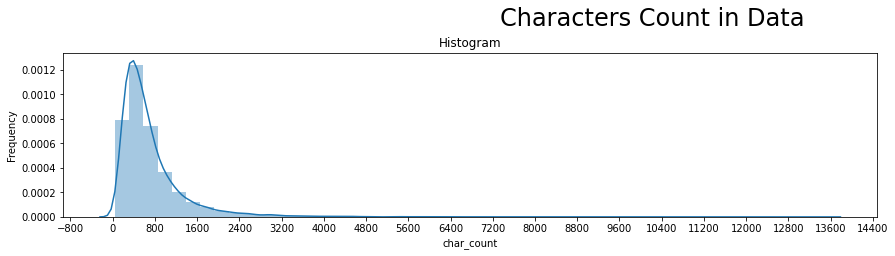

In [26]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

<a id="word_counts"></a>

## Word Counts

We see that the situation in the number of characters and the situation in the number of words are the same. We have seen that people use less word count when expressing negative things.

In [29]:
def plot_word_number_histogram(textno, textye, textz):
    
    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')
    sns.distplot(textz.str.split().map(lambda x: len(x)), ax=axes[2], color='#e74c3c')

    
    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('netrual')
    axes[2].set_xlabel('Word Count')
    axes[2].set_title('pozitive')
    
    fig.suptitle('Words Per Review', fontsize=24, va='baseline')
    
    fig.tight_layout()

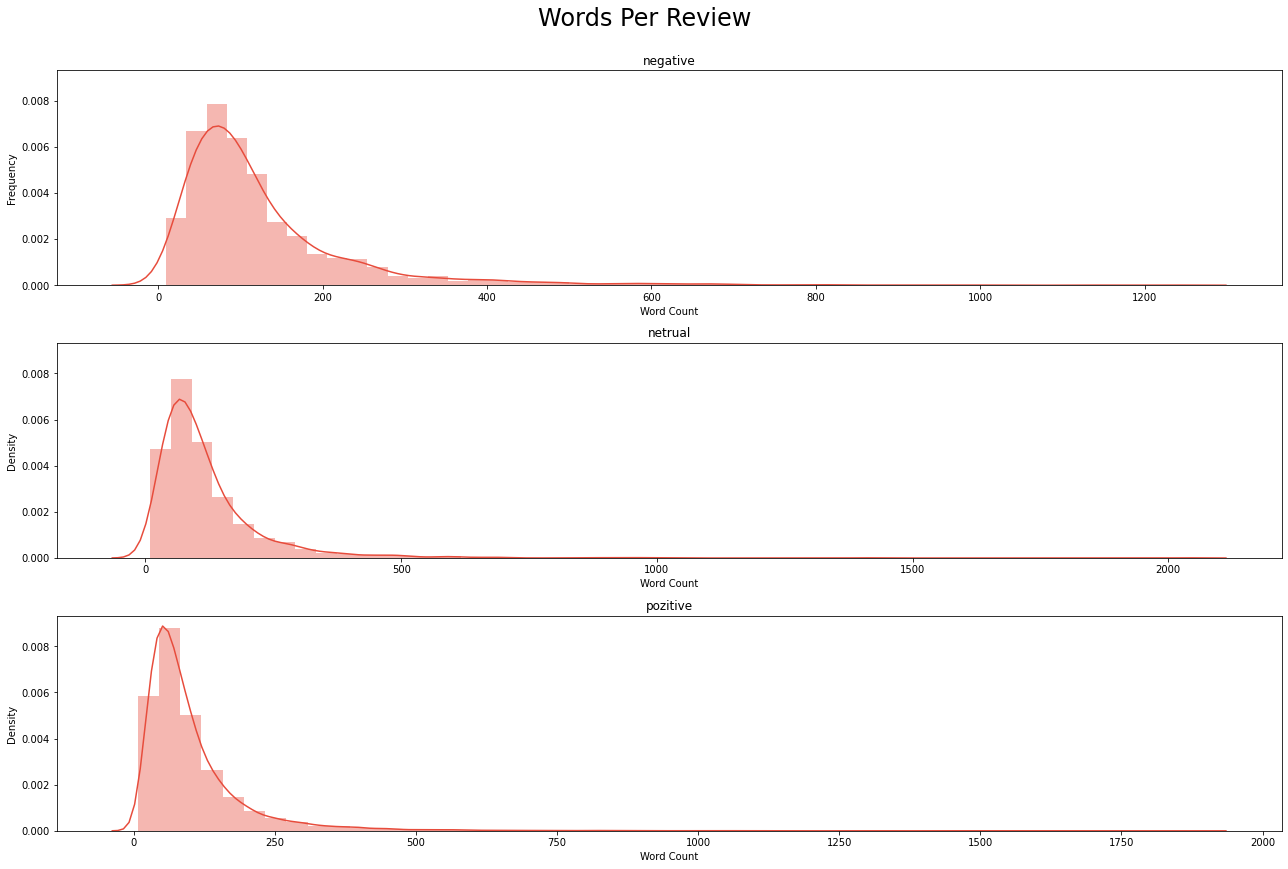

In [30]:
plot_word_number_histogram(df[df['label'] == 0]['Review'],
                           df[df['label'] == 1]['Review'],
                           df[df['label'] == 2]['Review'],
                          )

In [31]:
# remove punk 
df['tokenized_review'] = df['tokenized_review'].apply(lambda x: remove_punct(x))


<a id="most_common_ngrams"></a>

## Most Common ngrams

In [32]:
fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    
fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ),)


fig.show()

In [33]:
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

In [34]:
# unigram
fig = make_subplots(rows=1, cols=3)

title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]
    top_n_bigrams = _get_top_ngram(texts, 2)[:15]
    x, y = map(list, zip(*top_n_bigrams))


    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1)
    

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))      
fig.show()

In [35]:
#trigram

fig = make_subplots(rows=1, cols=3)
title_ = ["negative", "neutral", "positive"]

for i in range(3):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for i in new for word in i]

    top_n_bigrams = _get_top_ngram(texts, 3)[:15]
    x, y = map(list, zip(*top_n_bigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h', type="bar",
        name=title_[i], marker=dict(color=colors[i])), 1, i+1),

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,title=dict(
        text='<b>Most Common trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
        family="Courier New, monospace",
        size=24,
        color="RebeccaPurple"
        )
    ))
    
fig.show()

**We examined and visualized the data, now we can move on to the model building part.**

<a id="models"></a>
<strong><center><h1><div class="top_section">3. MODELS</div></h1></center></strong>


<a id="brief_informartion_about_Bert"></a>

<strong><h2>A brief information about BERT</h2></strong>


![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/bert_arch.png)

**BERT** makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. In its vanilla form, Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary. 

BERT is a bi-directional transformer for pre-training over a lot of unlabeled textual data to learn a language representation that can be used to fine-tune for specific machine learning tasks. While BERT outperformed the NLP state-of-the-art on several challenging tasks, its performance improvement could be attributed to the bidirectional transformer, novel pre-training tasks of Masked Language Model and Next Structure Prediction along with a lot of data and Google’s compute power.

The detailed workings of Transformer are described in a paper by Google.

<strong><h2>Comparison of Transformer Models</h2></strong>

![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/transformers_model_compare.png)

            source = https://towardsdatascience.com/bert-roberta-distilbert-xlnet-which-one-to-use-3d5ab82ba5f8




In [40]:
# set random seed and device
import random

device = config.device

random.seed(config.seed_val)
np.random.seed(config.seed_val)
torch.manual_seed(config.seed_val)
torch.cuda.manual_seed_all(config.seed_val)

In [41]:
df.head()

,Review,Rating,label,label_name,tokenized_review,sent_token_length,char_count,Character Count
0,nice hotel expensive parking got good deal sta...,4,2,Positive,nice hotel expensive parking got good deal sta...,88,593,593
1,ok nothing special charge diamond member hilto...,2,0,Negative,ok nothing special charge diamond member hilto...,258,1689,1689
2,nice rooms not 4 experience hotel monaco seat...,3,1,Neutral,nice rooms not 4 experience hotel monaco seatt...,237,1427,1427
3,unique great stay wonderful time hotel monac...,5,2,Positive,unique great stay wonderful time hotel monaco ...,92,600,600
4,great stay great stay went seahawk game aweso...,5,2,Positive,great stay great stay went seahawk game awesom...,197,1281,1281


<a id="inference"></a>

<strong><center><h1><div class="top_section">4. INFERENCE</div></h1></center></strong>

In [ ]:
test_df.head()

In [ ]:
encoded_data_test = tokenizer.batch_encode_plus(
    test_df.Review.values, 
    add_special_tokens=config.add_special_tokens, 
    return_attention_mask=config.return_attention_mask, 
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length, 
    return_tensors=config.return_tensors
)

In [ ]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_df.label.values)

In [ ]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(config.device)

model.load_state_dict(torch.load(f'./_BERT_epoch_3.model', map_location=torch.device('cpu')))

_, predictions_test, true_vals_test = evaluate(dataloader_validation)
# accuracy_per_class(predictions, true_vals, intent2label)

In [ ]:
from sklearn.metrics import classification_report

preds_flat_test = np.argmax(predictions_test, axis=1).flatten()
print(classification_report(preds_flat_test, true_vals_test))

In [ ]:
pred_final = []

for i, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    predictions = []

    review = row["Review"]
    encoded_data_test_single = tokenizer.batch_encode_plus(
    [review], 
    add_special_tokens=config.add_special_tokens, 
    return_attention_mask=config.return_attention_mask, 
    pad_to_max_length=config.pad_to_max_length, 
    max_length=config.seq_length,
    return_tensors=config.return_tensors
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']

    
    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():        
        outputs = model(**inputs)
    
    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_final.append(np.argmax(predictions, axis=1).flatten()[0])

In [ ]:
# add pred into test
test_df["pred"] = pred_final

In [ ]:
#  Add control column for easier wrong and right predictions
control = test_df.pred.values == test_df.label.values
test_df["control"] = control

In [ ]:
# filtering false predictions
test_df = test_df[test_df.control == False]

In [ ]:
test_df["pred_name"] = test_df.pred.apply(lambda x: label2name.get(x)) 

In [ ]:
from sklearn.metrics import confusion_matrix

# We create a confusion matrix to better observe the classes that the model confuses.
pred_name_values = test_df.pred_name.values
label_values = test_df.label_name.values
confmat = confusion_matrix(label_values, pred_name_values, labels=list(name2label.keys()))

In [ ]:
confmat

In [ ]:
df_confusion_test = pd.crosstab(label_values, pred_name_values)
df_confusion_test

<a id="references"></a>

<strong><center><h1><div class="top_section">5. References</div></h1></center></strong>

1. [Hugging Face](https://huggingface.co/) 
2. [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)
3. [RoBERTa: A Robustly Optimized BERT Pretraining Approach](https://arxiv.org/abs/1907.11692)
4. [XLNet: Generalized Autoregressive Pretraining for Language Understanding](https://arxiv.org/abs/1906.08237)
5. [Coursera](https://www.coursera.org/projects/sentiment-analysis-bert)
